Welcome to my Project

In [106]:
#dataset link="https://www.kaggle.com/d4rklucif3r/restaurant-reviews"

In [107]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
#importing Dataset
df=pd.read_csv("/content/Restaurant_Reviews.tsv",sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [109]:
#showing random reviews for testing after completing the prediction model. 
df['Review'][4]

'The selection on the menu was great and so were the prices.'

In [110]:
df['Review'][10]

'Service was very prompt.'

In [111]:
df['Review'][20]

'The Burrittos Blah!'

In [112]:
#checking null values
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [113]:
#info() shows all information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


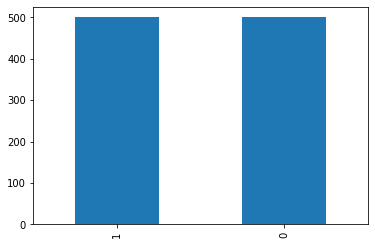

In [114]:
#data visualization for good and bad review
#Here dataset contains same number of reviews good and bad
df['Liked'].value_counts().plot(kind='bar')

In [115]:
#checking values of the 'Liked' column
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [116]:
#slicing the dataframe 
x = df['Review'].values
y = df['Liked'].values

In [117]:
# Spliting the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [118]:
# applying count vectorizer / bag of words technique
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [119]:
#all the text is converted to numerical values
x_train_vect.toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
#METHOD 1
#from support vector machines import support vector classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [121]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [122]:
#from sklearn. metric evaluating r2_score
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

0.72

In [123]:
# METHOD 2 - using pipelines 
# SVC + countvectorizer 
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [124]:
accuracy_score(y_pred2,y_test)

0.792

In [125]:
#USING NAIVE BAYES 

In [126]:
# Method 3

In [127]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [128]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [129]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [130]:
accuracy_score(y_pred3,y_test)

0.744

In [131]:
#METHOD 4 NB + Countvectorizer pipeline
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [132]:
accuracy_score(y_pred4,y_test)

0.784

In [133]:
# accuracy score - 0.72  (SVC)
# accuracy score - 0.792  (SVC pipeline)
# accuracy score - 0.744 (MultinomialNB)
# accuracy score - 0.784  (MultinomialNB pipeline)

In [134]:
#web app 

In [135]:
import joblib 
joblib.dump(model2,'resto-review')

['resto-review']

In [136]:
import joblib
reload_model = joblib.load('resto-review')

In [137]:
#checking wheather the model gives accurate prediction or not
reload_model.predict(['hello'])

array([0])

In [138]:
reload_model.predict(['not good'])

array([0])

In [139]:
reload_model.predict(['very  nice'])

array([1])

In [140]:
reload_model.predict(['wow its amazing'])

array([1])

In [141]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

In [142]:
%%writefile app.py 
import streamlit as st 
import joblib 

#setting the page name and logo
from PIL import Image
img=Image.open("/content/logo.png")

st.set_page_config(page_title="Sentiment Analysis",page_icon=img)


st.title("Restaurant Review")

reload_model = joblib.load('resto-review')

ip = st.text_input("Enter the Review To check wheather The Review is Good or Not:")
op = reload_model.predict([ip])
review = ['Positive','Negative'] 
if st.button('PREDICT'):
  #st.title(op[0])
  if op[0]==1:
    st.subheader("The Review is Good...!")
  elif op[0]==0:
    st.subheader("Oops..! The Review is Not Good...!")
  else:
    print("wait..!")

#st.file_uploader("Upload a csv")  #this line is for uoloading the file.


Overwriting app.py


In [143]:
#to run this streamlit web application 
!streamlit run app.py & npx localtunnel --port 8501


2022-04-10 20:12:26.545 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.355s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.199.194.25:8501

your url is: https://happy-cow-38.loca.lt
  Stopping...
^C
